In [1]:
from matplotlib import cm
import matplotlib.pylab as plt 
import matplotlib.pyplot as mp
import numpy as np
plt.style.use("seaborn-dark") # print(plt.style.available)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
# import matplotlib.pyplot as plt

In [2]:
loss_matrix = np.load("loss_matrix_DGM_DRM.npy")

In [3]:
step_size = 0.001 
grid = np.arange(-0.01, 0.01 + step_size, step_size)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


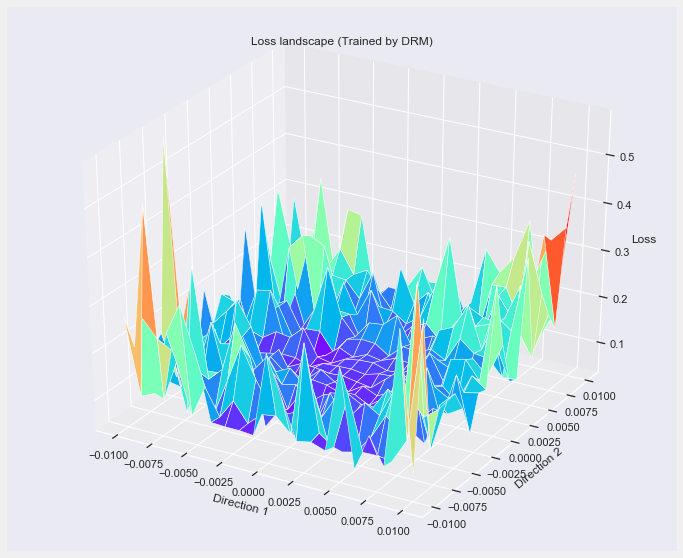

In [4]:
fig = plt.figure(figsize = (12, 10))
 
ax = fig.add_subplot(projection='3d') 

mp.gcf().set_facecolor(np.ones(3) * 240/255)

# make data
xx = np.arange(-0.01, 0.01 + step_size, step_size)
yy = np.arange(-0.01, 0.01 + step_size, step_size) 
x, y = np.meshgrid(xx, yy)
z = np.zeros((len(grid), len(grid)))

for dx in grid:
    for dy in grid:
        itemindex_1 = np.argwhere(grid == dx)
        itemindex_2 = np.argwhere(grid == dy)
        z[itemindex_1[0][0], itemindex_2[0][0]] = loss_matrix[itemindex_1[0][0], itemindex_2[0][0]]

# plot the surface
ax.plot_surface(x, y, z, cmap = 'rainbow', label = 'loss landscape', linewidth = 0.5)

plt.title('Loss landscape (Trained by DRM)')
ax.set_xlabel('Direction 1', size = 12) 
ax.set_ylabel('Direction 2', size = 12)
ax.set_zlabel('Loss', size = 12)

plt.savefig("Losslandscape3D_DGM_DRM.eps", dpi = 120)
plt.show()

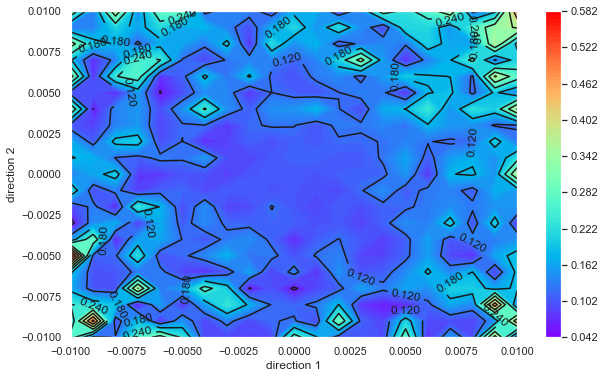

In [5]:
# set figure: length = 10 width = 6
mp.figure(figsize = (10, 6))

# fill color
# mp.contourf(x, y, z, 100, cmap = mp.cm.hot)
cset = mp.contourf(x, y, z, 100, cmap = mp.cm.rainbow)
# or plt.contourf(X,Y,Z, cmap = 'rainbow')

contour = mp.contour(x, y, z, 8, colors = 'k')

# label
mp.clabel(contour, fontsize = 12, colors = 'k')
mp.xlabel('direction 1')
mp.ylabel('direction 2')
 
# show bar
mp.colorbar(cset)
plt.savefig("Losslandscape2D_DGM_DRM.eps", dpi = 120)
mp.show()

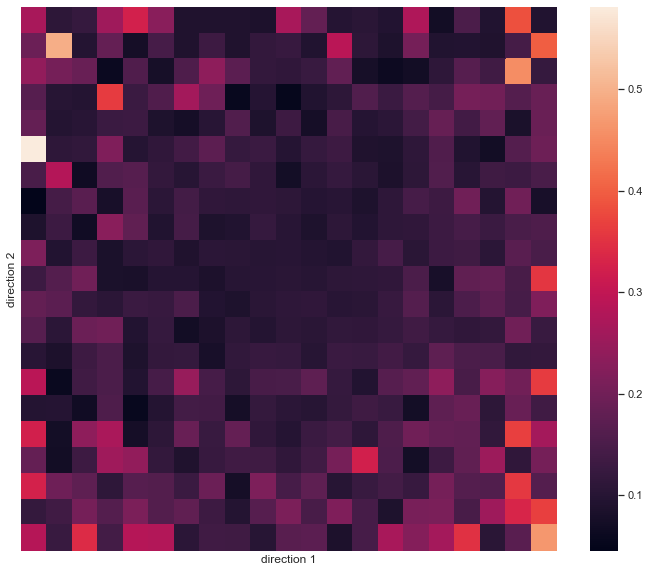

In [6]:
fig = plt.figure(figsize = (12, 10))
ax1 = sns.heatmap(z, xticklabels = False, yticklabels = False)
ax1.set_xlabel('direction 1', size = 12) 
ax1.set_ylabel('direction 2', size = 12) 
plt.savefig("losslandscape_heatmap_DGM_DRM.eps", dpi = 120)